In [1]:
from bpd.io import load_dataset
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ["JAX_PLATFORMS"] = "cpu"
os.environ["JAX_ENABLE_X64"] = "True"


## Initial shape noise 

In [3]:
# use random uniform value centered around truth

In [47]:
fpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp70_44/interim_samples_441_plus.npz"

In [54]:
ds = load_dataset(fpath)

In [55]:
ds.keys()

dict_keys(['hyper', 'samples', 'truth'])

In [56]:
ds['samples'].keys()

dict_keys(['e2', 'e1'])

In [57]:
e_mag = np.sqrt(ds['samples']['e1'].ravel()**2 + ds['samples']['e2'].ravel()**2)

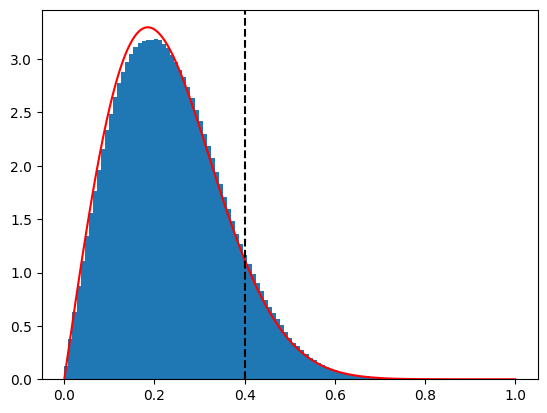

In [68]:
from bpd.prior import ellip_mag_prior
_ = plt.hist(e_mag, bins=101, density=True)

x = np.linspace(0, 1, 10000) 
y = ellip_mag_prior(x, sigma=0.2)
plt.plot(x, y, color='r')

plt.axvline(0.4, ls='--', c='k')


In [ ]:
# an alternative to initialization is to fit the density, but we can defer that for future work

# Shear results 

In [1]:
from bpd.io import load_dataset
import numpy as np
import matplotlib.pyplot as plt 

In [7]:
pfpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp71_44/shear_samples_442_plus.npz"
mfpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp71_44/shear_samples_442_minus.npz"


dsp = load_dataset(pfpath)
dsm = load_dataset(mfpath)

In [12]:
gp1 = dsp['samples']['g1']
gm1 = dsm['samples']['g1']
gp1.shape

(3000,)

In [16]:
m = (gp1.mean()-gm1.mean()) / 2 / 0.02 - 1
m

np.float64(-0.0007609892459770062)

In [18]:
gp2 = dsp['samples']['g2']
gm2 = dsm['samples']['g2']
gp2.shape

(3000,)

In [20]:
c = (gp2.mean()+gm2.mean()) / 2
c

np.float64(-0.0012594486575723163)

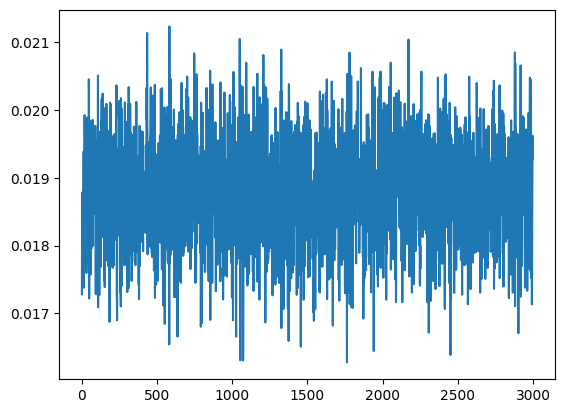

In [9]:
plt.plot(gp1)

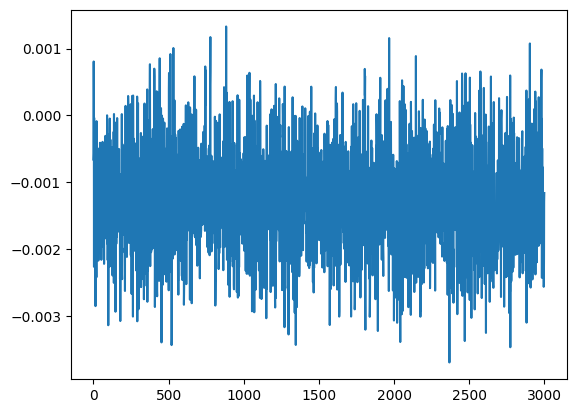

In [23]:
plt.plot(gp2)

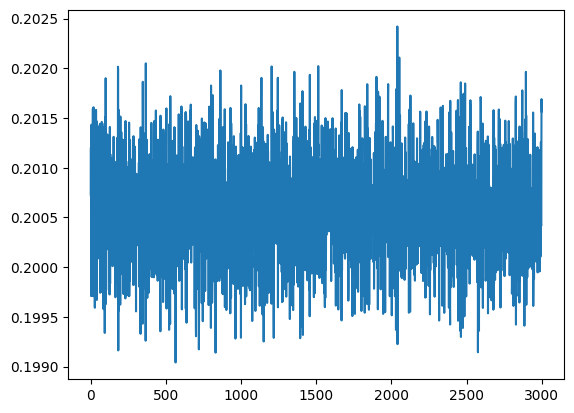

In [10]:
plt.plot(dsp['samples']['sigma_e'])

In [ ]:
ds['samples']['g1']

# Bootstraps 

In [24]:
from bpd.io import load_dataset
import numpy as np
import matplotlib.pyplot as plt 

In [25]:
fpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp71_44/g_samples_boots_443.npz"

In [26]:
ds = load_dataset(fpath)

In [27]:
ds.keys()

dict_keys(['minus', 'plus'])

In [28]:
ds['plus'].keys()

dict_keys(['g2', 'g1', 'sigma_e'])

In [29]:
ds['plus']['g1'].shape, ds['plus']['sigma_e'].shape

((202, 1000), (202, 1000))

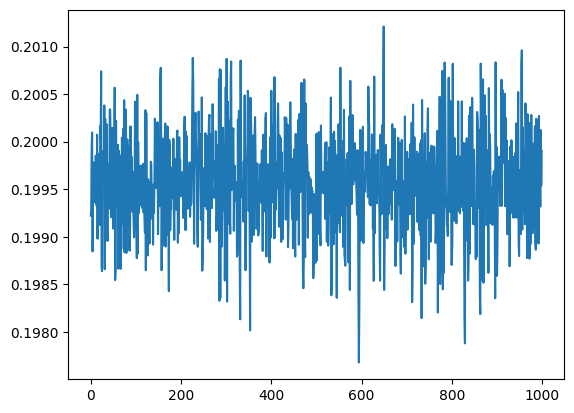

In [30]:
plt.plot(ds['plus']['sigma_e'][5])

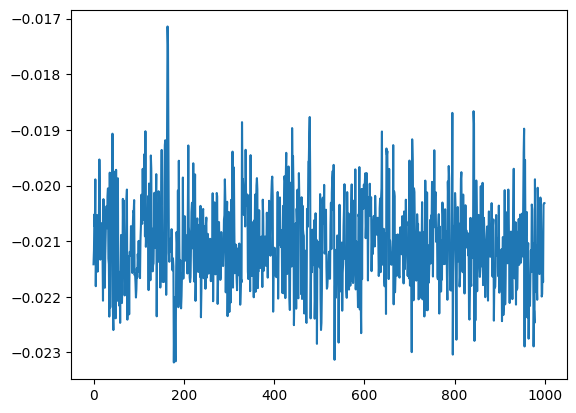

In [31]:
plt.plot(ds['minus']['g1'][0])

In [32]:
gp1 = ds['plus']['g1']
gm1 = ds['minus']['g1']

In [33]:
gp1.shape, gm1.shape

((202, 1000), (202, 1000))

In [34]:
g1 = 0.02

In [35]:
mboot = (
    gp1.mean(axis=1) - gm1.mean(axis=1)
) / 2 / g1 - 1

(array([ 8.,  8., 13., 34., 37., 37., 36., 19.,  8.,  2.]),
 array([0.01684165, 0.01721554, 0.01758943, 0.01796332, 0.01833721,
        0.0187111 , 0.01908499, 0.01945887, 0.01983276, 0.02020665,
        0.02058054]),
 <BarContainer object of 10 artists>)

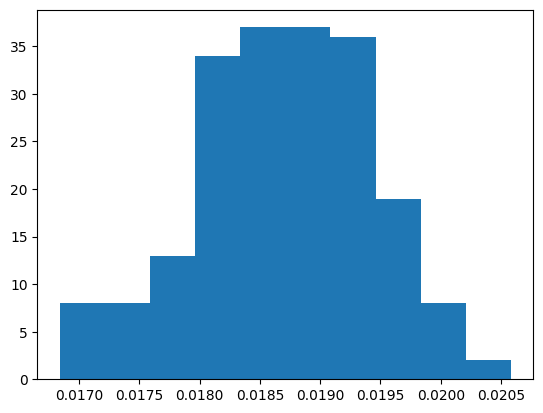

In [36]:
plt.hist(gp1.mean(axis=1))

(array([ 8.,  4., 11., 29., 52., 55., 23., 10.,  6.,  4.]),
 array([-0.00303344, -0.00258045, -0.00212746, -0.00167447, -0.00122148,
        -0.00076849, -0.0003155 ,  0.00013749,  0.00059048,  0.00104347,
         0.00149646]),
 [<matplotlib.patches.Polygon at 0x7ff1c1d35a30>])

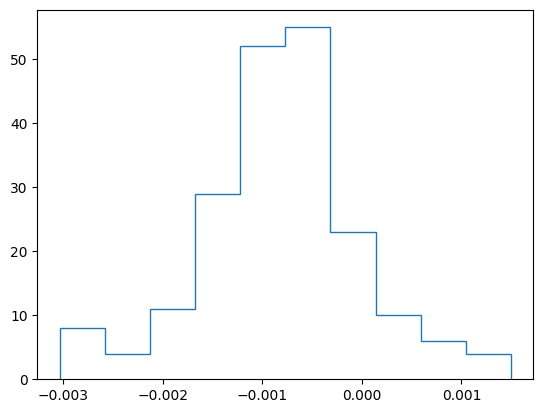

In [37]:
plt.hist(mboot, histtype='step')

In [38]:
mboot.mean(), mboot.std()

(np.float64(-0.0008057393980094626), np.float64(0.0007949594543486603))

In [39]:
mboot.mean() / 1e-3, mboot.std() / 1e-3

(np.float64(-0.8057393980094626), np.float64(0.7949594543486602))

In [41]:
# c
gp2 = ds['plus']['g2']
gm2 = ds['minus']['g2']
gp2.shape

(202, 1000)

In [42]:
cs = (gp2.mean(1) + gm2.mean(1)) / 2

In [44]:
cs.mean(), cs.std()

(np.float64(-0.0011715739875358998), np.float64(0.0007805949445287774))

# Alternative method of estimating errors

In [45]:
from bpd.io import load_dataset
import numpy as np
import matplotlib.pyplot as plt 

In [46]:
fpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp71_44/g_samples_449_errs.npz"

In [47]:
ds = load_dataset(fpath)

In [48]:
g1p = ds['plus']['g'][:, :, 0]
g1p.shape

(500, 1000)

In [49]:
g1m = ds['minus']['g'][:, :, 0]
g1m.shape

(500, 1000)

In [50]:
m = (g1p.mean(1) - g1m.mean(1)) / 2/ 0.02  - 1
m.shape

(500,)

(array([  3.,  16.,  50., 109., 126., 112.,  61.,  20.,   2.,   1.]),
 array([-0.05437142, -0.04315671, -0.031942  , -0.02072729, -0.00951258,
         0.00170213,  0.01291684,  0.02413155,  0.03534626,  0.04656097,
         0.05777569]),
 <BarContainer object of 10 artists>)

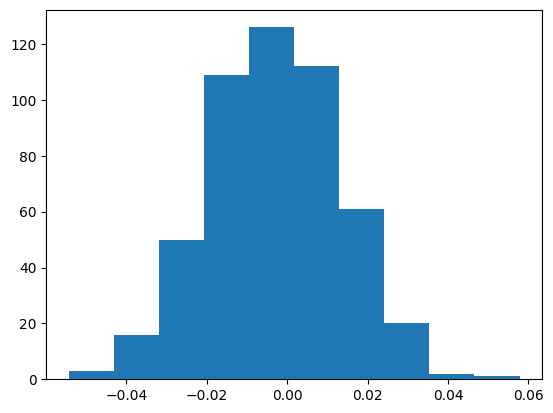

In [51]:
plt.hist(m)

In [52]:
m.mean()  / 1e-3 

np.float64(-2.7576039461028867)

In [53]:
m.std() / np.sqrt(len(m)) / 1e-3

np.float64(0.7354796286959472)

In [55]:
#  c
g2p = ds['plus']['g'][:, :, 1]
g2m = ds['minus']['g'][:, :, 1]
g2p.shape, g2m.shape

((500, 1000), (500, 1000))

In [56]:
cs = (g2p.mean(1) + g2m.mean(1)) / 2 
cs.mean(), cs.std() / np.sqrt(500)

(np.float64(-0.0012552373109422563), np.float64(0.0007393630315346166))